In [40]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sfft

# K-space introduction
## K-space and transform to image space
 - we are going to load the k-space data of an MRI image
 - we will then apply a 2D inverse Fourier Transform to convert the data to the image space

$$f(x,y) = \left(\frac{1}{2 \pi}\right)^2 \int_{- \infty}^{+\infty} \int_{- \infty}^{+\infty} F(k_x,k_y) e^{i 2 \pi (k_x x + k_y y)} \, dk_x \,dk_y$$


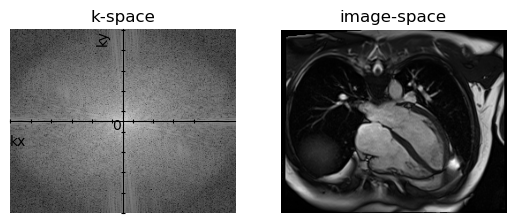

In [41]:
# load k-space data
k_space = np.load("k_space_data_4ch.npz")
size = k_space["size"]
k_space = k_space["k_space"]

# convert to image space
i_space = sfft.ifft2(sfft.ifftshift(k_space))

# display both k-space and the respective magnitude image
f = plt.figure()
ax = f.add_subplot(1, 2, 1)
plt.imshow(np.log10(np.abs(k_space)), cmap="gray")
# format ticks
ax.tick_params(direction="inout", axis="both")
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines["left"].set_position("center")
ax.spines["bottom"].set_position("center")
# Eliminate upper and right axes
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
# tick positions and labels
ax.set_xticks(np.linspace(0, size[0], 10))
ax.set_xticklabels([""] * 10)
ax.set_yticks(np.linspace(0, size[0], 10))
ax.set_yticklabels([""] * 10)
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
# label axis
plt.xlabel("kx", loc="left")
plt.ylabel("ky", loc="top")
# add label at zeroth frequency
plt.text(size[0] * 0.5 + 12, size[1] * 0.5 - 15, r"0", fontsize=10)
plt.title("k-space");

ax = f.add_subplot(1, 2, 2)
plt.imshow(np.abs(i_space), cmap="gray")
plt.axis("off")
plt.title("image-space");


---
## k-space: a collection of sinusoidal oscillations
Each k-space pixel will contain information about the entire image. We can think of k-space as a collection of sinusoidal oscillations with different orientations and frequencies with different weights.

For example here is a k-space with only a non-zero pixel in the centre. This is equivalent to a flat image:

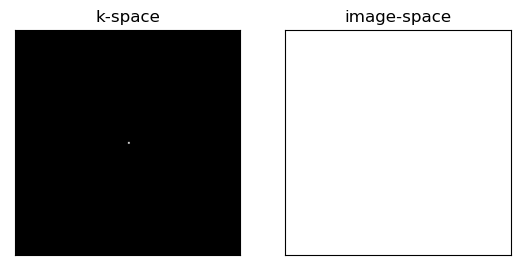

In [42]:
k_space_a = np.zeros((128, 128), dtype="complex")
k_space_a[64, 64] = 1

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.abs(k_space_a), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(sfft.ifft2(sfft.ifftshift(k_space_a))), cmap="gray", vmin=-1, vmax=0)
plt.xticks([])
plt.yticks([])
plt.title("image-space");

Now if we add another identical pixel shifted vertically, we get a vertical sinusoidal oscillation:

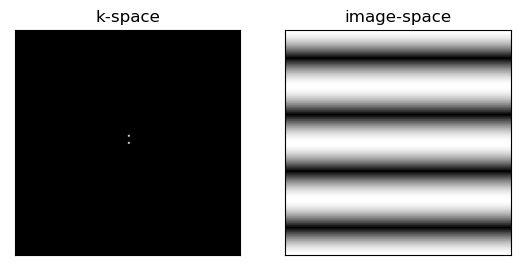

In [43]:
k_space_b = np.zeros((128, 128), dtype="complex")
k_space_b[64, 64] = 1
k_space_b[60, 64] = 1

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.abs(k_space_b), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(sfft.ifft2(sfft.ifftshift(k_space_b))), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("image-space");

If we further move the second pixel vertically, i.e. to even higher frequencies, we get a vertical sinusoidal oscillation with higher frequencies:

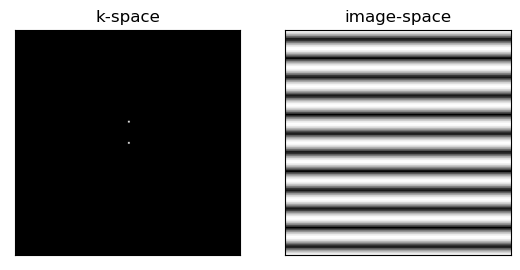

In [44]:
k_space_c = np.zeros((128, 128), dtype="complex")
k_space_c[64, 64] = 1
k_space_c[52, 64] = 1

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.abs(k_space_c), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(sfft.ifft2(sfft.ifftshift(k_space_c))), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("image-space");

If we now move the second pixel horizontally, we rotate the oscillation to the diagonal direction:

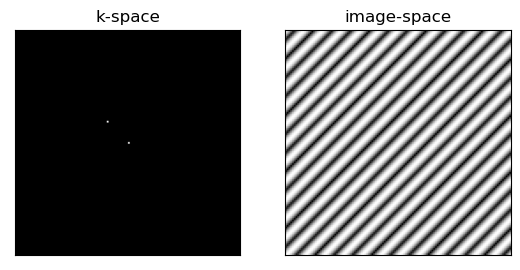

In [45]:
k_space_d = np.zeros((128, 128), dtype="complex")
k_space_d[64, 64] = 1
k_space_d[52, 52] = 1

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.abs(k_space_d), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(sfft.ifft2(sfft.ifftshift(k_space_d))), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("image-space");

Adding all cases above, will increase the complexity of the image:

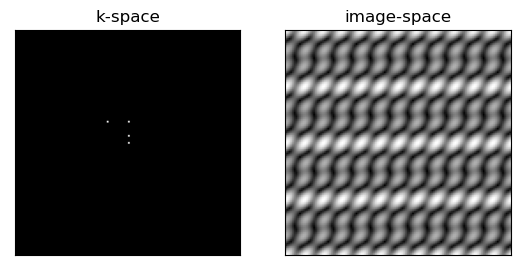

In [46]:
k_space_e = np.zeros((128, 128), dtype="complex")
k_space_e[64, 64] = 1
k_space_e[60, 64] = 1
k_space_e[52, 64] = 1
k_space_e[52, 52] = 1

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.abs(k_space_e), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(sfft.ifft2(sfft.ifftshift(k_space_e))), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("image-space");

---
## k-space regions
- the central regions contain low frequency information, i.e. the contrast of the image
- the outer regions contain high frequency information, i.e. the detail and edges of the image

Let's display the image when considering only the central region of k-space:

k-space central region
k-space region covered by mask: 2.8%
k-space signal covered by mask: 38.0%


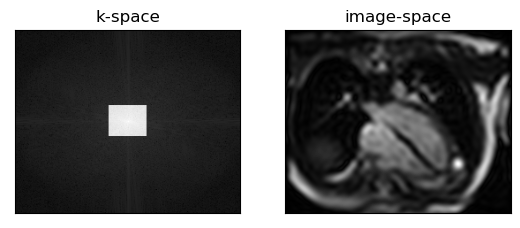

In [47]:
# create masks to show only/exclude the central region
a, b = int(k_space.shape[0] * 0.5), int(k_space.shape[1] * 0.5)
mask = np.zeros(k_space.shape) + np.finfo(float).eps
mask[int(a - a / 6) : int(a + a / 6), int(b - b / 6) : int(b + b / 6)] = 1
mask = mask * 1 + 0j
mask_inv = 1 - mask + np.finfo(float).eps

# apply mask to k-space and convert to image space
i_space = sfft.ifft2(sfft.ifftshift(k_space * mask))

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(k_space * mask)), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(i_space), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("image-space");

# calculate the relative ammount of magnitude and fraction for the central portion
n_pixels = k_space.shape[0] * k_space.shape[1]
n_pixels_mask = np.sum(np.abs(mask))
mask_perc = n_pixels_mask / n_pixels

vals_sum_central = np.abs(k_space * mask)
vals_sum_central = np.sum(vals_sum_central[np.where(vals_sum_central != 0)])
vals_sum_all = np.abs(k_space)
vals_sum_all = np.sum(vals_sum_all)
vals_perc = vals_sum_central / vals_sum_all
print("====================================================")
print("k-space central region")
print("====================================================")
print("k-space region covered by mask: {:.1f}%".format(mask_perc * 100))
print("k-space signal covered by mask: {:.1f}%".format(vals_perc * 100))
print("====================================================")


Now let's do the opposite and display the image when considering only the outer regions of k-space:

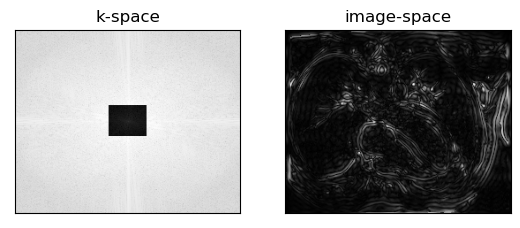

In [48]:
# repeat but this time to show only the outer regions
# apply mask to k-space and convert to image space
i_space = sfft.ifft2(sfft.ifftshift(k_space * mask_inv))

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(k_space * mask_inv)), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("k-space");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(i_space), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("image-space");

---
## Data truncation artefacts
Finally we will create a k-space with 2 2D sinc functions. The iFT will be two squares. But because we have a finite k-space, the squares will display Gibbs ringing at the edges.

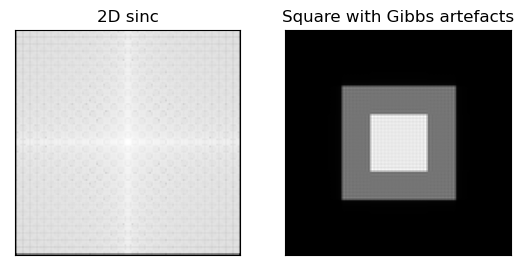

In [49]:
# create 2 2D sinc functions
# the IFT will be 2 squares
def sinc_2d_k_space(
    w,
    n,
):
    """
    Create a 2D sinc function in k-space
    """
    x = np.linspace(-1, 1, n)
    f = w * np.sinc(x * w)
    f = np.expand_dims(f, 1)
    # k-space
    k_s = f * f.T
    k_s = k_s + 0j

    return k_s


w1 = 32
w2 = 16
k_s_1 = sinc_2d_k_space(w1, 128)
k_s_2 = sinc_2d_k_space(w2, 128)
k_s = k_s_1 + k_s_2

# image space
i_s = sfft.fft2(k_s)
i_s = sfft.fftshift(i_s)

# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(k_s)), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("2D sinc");
plt.subplot(1, 2, 2)
plt.imshow(np.abs(i_s), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.title("Square with Gibbs artefacts");

Lets display a line profile to see the ringing in 1D.

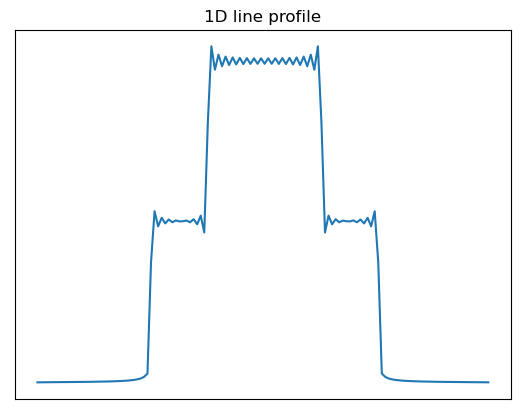

In [50]:
line_profile = np.abs(i_s[:, int(i_s.shape[1] * 0.5)])
# display both k-space and the respective magnitude image
plt.figure()
plt.subplot(1, 1, 1)
plt.plot(line_profile)
plt.xticks([])
plt.yticks([])
plt.title("1D line profile");